In [ ]:
!pip install ktrain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ktrain
from ktrain import text

In [ ]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
      df.apply(np.random.shuffle, axis=axis)
    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/ResearchData/EmojiData.xlsx')

In [ ]:
data.isnull().sum()

Date        0
Comments    0
Category    0
Emoji       0
dtype: int64

In [ ]:
len(data)
print(data.shape)

(199, 4)


In [ ]:
data.sort_values(by='Emoji', axis=0, inplace=True)

data.set_index(keys=['Emoji'], drop=False,inplace=True)

Emojis=data['Emoji'].unique().tolist()

In [ ]:
positives = shuffle(data.loc[data.Emoji=='💁'])
negatives = shuffle(data.loc[data.Emoji=='🤦'])
neutrals = shuffle(data.loc[data.Emoji=='🤷'])

In [ ]:
positives_train = positives.iloc[0:int(positives.shape[0]*0.8)]
positives_test = positives.iloc[int(positives.shape[0]*0.8)+1:positives.shape[0]]

negatives_train = negatives.iloc[0:int(negatives.shape[0]*0.8)]
negatives_test = negatives.iloc[int(negatives.shape[0]*0.8)+1:negatives.shape[0]]

neutrals_train = neutrals.iloc[0:int(neutrals.shape[0]*0.8)]
neutrals_test = neutrals.iloc[int(neutrals.shape[0]*0.8)+1:neutrals.shape[0]]

data_train = pd.concat([positives_train, negatives_train, neutrals_train])
data_test = pd.concat([positives_test, negatives_test, neutrals_test])

print(data_train.shape)
print(data_test.shape)

(158, 4)
(38, 4)


In [ ]:
X_train = data_train.Comments.tolist()
X_test = data_test.Comments.tolist()

y_train = data_train.Emoji.tolist()
y_test = data_test.Emoji.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['💁','🤦','🤷']

print('size of training set: %s' % (len(data_train['Comments'])))
print('size of validation set: %s' % (len(data_test['Comments'])))
print(data.Emoji.value_counts())

data.head(10)

size of training set: 158
size of validation set: 38
🤷    79
💁    60
🤦    57
Name: Emoji, dtype: int64


,Date,Comments,Category,Emoji
0,2021-07-01,প্রতিটি শিশুকে সুস্থভাবে বাঁচার আশ্বাস দিতে হবে ।,positive,💁
1,2021-07-01,বি​বাহিত নারীদের একটা বড় অংশ শিশুবধূ।,positive,💁
2,2021-07-01,সব শিশু নিষ্পাপ।,positive,💁
3,2021-07-01,শিশু শ্রম ও শিশুর প্রতি সহিংসতা বন্ধে শিশু ও শ...,positive,💁
4,2021-07-02,শিশুরা সৃষ্টির জন্ম লগ্ন থেকে নিঃস্বার্থ ভালব...,positive,💁
5,2021-07-01,বাংলাদেশে বাল্যবিবাহের হার আগের তুলনায় কমেছে,positive,💁
6,2021-07-01,তাকে একটা গ্লাসে পানি আনতে বললে একই ভাবে সে বা...,positive,💁
7,2021-07-01,বাংলাদেশে অনেক দ্রুততার সাথে পাঁচ বছরের কম বয়...,positive,💁
8,2021-07-01,শিশুদের জন্য প্রাথমিক শিক্ষা বাধ্যতামূলক করেছে...,positive,💁
9,2021-07-01,মা-বাবা একটু খেয়াল করলেই বুঝতে পারেন অন্য শিশ...,positive,💁


In [ ]:

encoding = {
    '💁': 0,
    '🤦': 1,
    '🤷': 2,
}
 # encoding = encoding.MultipartEncoder('utf-8')
 # Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'roberta-base'

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen=500, classes=class_names)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:420: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: bn
train sequence lengths:
	mean : 13
	95percentile : 22
	99percentile : 27


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 16
	99percentile : 18


In [ ]:
!pip install bertviz

In [ ]:
from bertviz import model_view
model_view(model, data)

TypeError: ignored

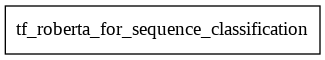

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=4)

In [ ]:
hist = learner.fit_onecycle(2e-5, 8)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/8
40/40 [==============================] - 1076s 26s/step - loss: 1.1055 - accuracy: 0.2785 - val_loss: 1.0918 - val_accuracy: 0.3947
Epoch 2/8
40/40 [==============================] - 1072s 27s/step - loss: 1.1019 - accuracy: 0.4241 - val_loss: 1.0889 - val_accuracy: 0.3947
Epoch 3/8
40/40 [==============================] - 1073s 27s/step - loss: 1.0891 - accuracy: 0.3861 - val_loss: 1.0908 - val_accuracy: 0.3947
Epoch 4/8
40/40 [==============================] - 1073s 27s/step - loss: 1.1044 - accuracy: 0.3291 - val_loss: 1.0883 - val_accuracy: 0.3947
Epoch 5/8
40/40 [==============================] - 1069s 27s/step - loss: 1.0876 - accuracy: 0.4051 - val_loss: 1.0896 - val_accuracy: 0.3947
Epoch 6/8
40/40 [==============================] - 1067s 27s/step - loss: 1.0956 - accuracy: 0.4051 - val_loss: 1.0897 - val_accuracy: 0.3947
Epoch 7/8
40/40 [==============================] - 1062s 27s/step - loss: 1.0917 - ac

In [ ]:
learner.validate(val_data=val, class_names= class_names)

              precision    recall  f1-score   support

           💁       0.00      0.00      0.00        12
           🤦       0.00      0.00      0.00        11
           🤷       0.39      1.00      0.57        15

    accuracy                           0.39        38
   macro avg       0.13      0.33      0.19        38
weighted avg       0.16      0.39      0.22        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  0, 12],
       [ 0,  0, 11],
       [ 0,  0, 15]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.get_classes()

['💁', '🤦', '🤷']

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
import itertools
import matplotlib.pyplot as plt

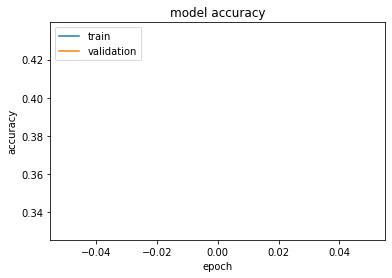

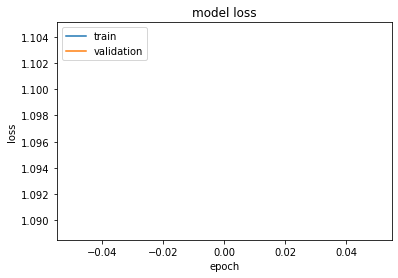

In [ ]:

# Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
predictions = [predictor.predict(pred) for pred in X_test]
print(precision_recall_fscore_support(data_test.Emoji, predictions, average='weighted',zero_division= 'warn'))

(0.44457048200363714, 0.43434343434343436, 0.39340067340067336, None)



F1 Score: 43.43


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128129 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129335 missing from current font.
  font.se

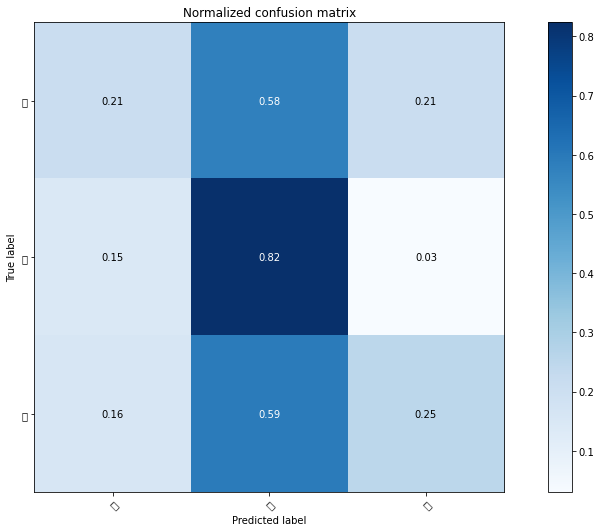

Message: অটিজম স্পেকট্রাম ডিসঅর্ডার বা এএসডি একটি সারাজীবনের প্রতিবন্ধকতা যার দ্বারা বাকি বিশ্বের সাথে কোন ব্যক্তির যোগাযোগ স্থাপন এবং সম্পর্ক তৈরি বাধাগ্রস্ত হয়।
Predicted: 🤷


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=confusion_matrix,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emoji, predictions, average='micro') * 100))

plot_confusion_matrix(data_test.Emoji, predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
#plot_confusion_matrix(y_true,y_pred)
plt.show()

print('Message: {}\nPredicted: {}'.format(X_test[22], predictions[22]))

In [ ]:
import time 

message = 'শিশু অপহরণ একটি বড় ধরনের সমস্যা'

start_time = time.time() 
prediction = predictor.predict(message)

if prediction == '0':
  print('💁')
if prediction == '1':
  print('🤦')
if prediction == '2':
  print('🤷')

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: 💁 (0.36)


In [ ]:
predictor.save("models/roberta_model")